# HW 5

In this homework you will complete 2 questions. One from chapter 14 and one perceptron machine learning problem using scikit-learn!

## Question 1 Least-Squares Regression Analysis

Use least-squares regression to fit a straight line to the following data:

| $x$  | 0  | 2  | 4  | 6  | 9  | 11 | 12 | 15 | 17 | 19 |
|--------|----|----|----|----|----|----|----|----|----|----|
| $y$  | 5  | 6  | 7  | 6  | 9  | 8  | 8  | 10 | 12 | 12 |

1. Determine the **slope** $m$ and **intercept** $b$ of the least-squares regression line.
2. Compute the **standard error of the estimate** $S_e$.
3. Calculate the **coefficient of determination** $R^2$.

### Formulas

1. **Slope $(m$)**:  
   $$
   m = \frac{n \sum (x_i y_i) - \sum x_i \sum y_i}{n \sum x_i^2 - \sum x_i^2}
   $$
   where $n$ is the length of $x$

2. **Intercept $(b$)**:  
   $$
   b = \frac{\sum y_i - m \sum x_i}{n}
   $$

3. **Standard Error of the Estimate $S_e$**:  
   $$
   S_e = \sqrt{\frac{\sum (y_i - \hat{y}_i)^2}{n - 2}}
   $$ 
   where $\hat{y}_i = m x_i + b$ are the predicted $y$-values.

4. **Coefficient of Determination $R^2$**:  
   $$
   R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
   $$  
   where $\bar{y} = \frac{\sum y_i}{n} \text{ is the mean of } y$.

### Instructions



In [1]:
#grade
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import pandas as pd

# Data
X = np.array([0, 2, 4, 6, 9, 11, 12, 15, 17, 19])
y = np.array([5, 6, 7, 6, 9, 8, 8, 10, 12, 12])

# Number of data points
n = len(X)

# Summations
sum_x_times_y = np.sum(X*y)
sum_x = np.sum(X)
sum_y = np.sum(y)
sum_x_squared = np.sum(X**2)

# Calculate slope (m) and intercept (b)
m = (n*sum_x_times_y - sum_x*sum_y)/(n*sum_x_squared - sum_x**2)
b = (sum_y - m*sum_x)/n

# Predicted y values
y_hat = m*X + b

# Calculate standard error of the estimate (Se)
se = np.sqrt(np.sum((y - y_hat)**2)/(n - 2))

# Calculate coefficient of determination (R^2)
y_bar = sum_y/n
r_squared = 1 - (np.sum((y - y_hat)**2))/np.sum((y - y_bar)**2)

# Output results
print('Slope: ', m)
print('Y-intercept: ', b)
print('Standard error: ', se)
print('Coefficient of determination: ', r_squared)
print('X: ', X)
print('y: ', y)

X*y
X**2

Slope:  0.3591455273698264
Y-intercept:  4.88811748998665
Standard error:  0.8510968341468516
Coefficient of determination:  0.8928849063076091
X:  [ 0  2  4  6  9 11 12 15 17 19]
y:  [ 5  6  7  6  9  8  8 10 12 12]


array([  0,   4,  16,  36,  81, 121, 144, 225, 289, 361])

## Questiom 2
In this task, you will use the Iris dataset to train a perceptron model for classification. Follow the steps below to preprocess the data, train the model, and evaluate its performance.
Steps:

1. Load the Dataset:

    Use the datasets module from scikit-learn to load the Iris dataset. Extract the petal length and petal width as the features (columns 2 and 3 of the dataset), and use the target labels (class labels).
2. Split the Dataset:
    
    Use the train_test_split function to split the dataset into training and test sets. Use 70% of the data for training and 30% for testing, ensuring stratification to maintain class proportions. Print the counts of each class in the training and test sets.
3. Standardize the Features:
    
    Standardize the training and test datasets using the StandardScaler class from scikit-learn. Ensure that the test set is scaled using the same parameters as the training set.
4. Train the Perceptron:
    
    Train a perceptron classifier using the Perceptron class from scikit-learn. Set the learning rate (eta0) to 0.1 and random_state to 1 for reproducibility.
5. Evaluate the Model:
    
    Predict the class labels for the test data using the trained perceptron. Count the number of misclassified examples and compute the accuracy using the accuracy_score function from scikit-learn.

### Expected Output:

| **Name**        | **Description**                                      | **Type**                                              |
|------------------|------------------------------------------------------|-------------------------------------------------------|
| `X`             | Input data for the model                             | `numpy.ndarray`                                       |
| `y`             | Class labels for the input data                      | `numpy.ndarray`                                       |
| `X_train`       | Training data                                         | `numpy.ndarray`                                       |
| `X_test`        | Test data                                             | `numpy.ndarray`                                       |
| `y_train`       | Class labels for the training data                   | `numpy.ndarray`                                       |
| `y_test`        | Class labels for the test data                       | `numpy.ndarray`                                       |
| `X_train_std`   | Standardized training data                           | `numpy.ndarray`                                       |
| `X_test_std`    | Standardized test data                               | `numpy.ndarray`                                       |
| `ppn`           | Perceptron model                                     | `<class 'sklearn.linear_model._perceptron.Perceptron'>` |
| `y_pred`        | Predicted class labels for the test data             | `numpy.ndarray`                                       |
| `accuracy`      | Accuracy of the model                                | `float`                                              |


### Notes for Students:

- Use the provided modules and methods from `scikit-learn`.
- Ensure all steps are reproducible by setting `random_state=1` wherever applicable.
- Provide code for each step along with the results.

### 1. Import Libraries and Load the Dataset
We first need to import the necessary libraries and load the Iris dataset.

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

In [3]:
#grade


# Load the Iris dataset
iris = datasets.load_iris()

# set X and y
X = iris.get('data')[:, -2:]
y = iris.get('target')

# Display unique class labels
print('target names: ', iris.get('target_names'))

target names:  ['setosa' 'versicolor' 'virginica']


### 2. Split the Dataset into Training and Test Sets

Next split the dataset into training and test sets, ensuring stratification for balanced class proportions.

In [4]:
#grade

# Split into 70% training and 30% test datasets
# define X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1, stratify=y)

# Verify stratification
# Calculate class distributions
original_distribution = dict(zip(*np.unique(y, return_counts=True)))
train_distribution = dict(zip(*np.unique(y_train, return_counts=True)))
test_distribution = dict(zip(*np.unique(y_test, return_counts=True)))

# Print distributions
print("Original class distribution:", original_distribution)
print("Training set class distribution:", train_distribution)
print("Testing set class distribution:", test_distribution)

Original class distribution: {0: 50, 1: 50, 2: 50}
Training set class distribution: {0: 35, 1: 35, 2: 35}
Testing set class distribution: {0: 15, 1: 15, 2: 15}


### 3. Standardize the Features

Feature scaling ensures that all features contribute equally to the model.

In [5]:
#grade

# Standardize features
# Define sc, fit, transform, and define X_train_std and X_test_std
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)



### 4. Train the Perceptron

We train a perceptron model using the Perceptron class from sklearn.

In [ ]:
#grade

# Train perceptron model
# Define ppn, fit, and predict

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

# Predict class labels for the test set
# Define y_pred
y_pred = ppn.predict(X_test_std)

# Count misclassified examples
incorrect = np.sum(y_test != y_pred)
print(f'{incorrect} samples were misclassified')

<class 'numpy.ndarray'>
2 samples were misclassified


### 5. Evaluate the Model

We evaluate the model’s accuracy using the `accuracy_score` function and the perceptron’s `score` method.

In [10]:
#grade

# Calculate accuracy using accuracy_score
# Define accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.9555555555555556

### 6. (For your enjoyment only)

graph the decision boundaries!

C:\Users\hunt3\AppData\Local\Temp\ipykernel_48028\1417315819.py:68: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


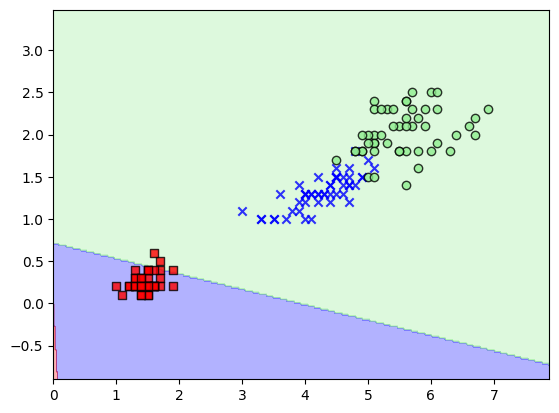

In [11]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    """
    Plot decision boundaries for a classifier and display data points.

    This function visualizes the decision boundaries of a classifier by creating a 
    grid of points across the feature space and coloring regions based on the 
    classifier's predictions. It also plots the training and test data points.

    Parameters:
    -----------
    X : ndarray of shape (n_samples, 2)
        Feature matrix containing two features for visualization.

    y : ndarray of shape (n_samples,)
        Target labels corresponding to the samples in X.

    classifier : object
        A trained classifier with a `predict` method.

    test_idx : array-like, optional (default=None)
        Indices of the test samples within X. Test samples are highlighted with 
        a distinct marker.

    resolution : float, optional (default=0.02)
        The resolution of the grid used to plot the decision surface. Smaller 
        values result in finer granularity but require more computation.

    Returns:
    --------
    None
        Displays the decision boundary plot with training and test data points.

    Notes:
    ------
    - The function assumes that `X` contains exactly two features.
    - It uses `ListedColormap` to define distinct colors for up to three classes.
    - Training samples are plotted with distinct markers and colors, and test 
      samples (if provided) are highlighted with yellow circles.

    Example:
    --------
    plot_decision_regions(X_combined_std, y_combined, classifier=ppn, 
                          test_idx=range(105, 150))
    """
    # Set up marker generator and color map
    markers = ('s', 'x', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution),
    )
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            c=colors[idx],
            marker=markers[idx],
            label=f'Class {cl}',
            edgecolor='black',
        )
    
    # Highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c='yellow',
            edgecolor='black',
            alpha=1.0,
            linewidth=1,
            marker='o',
            s=100,
            label='Test set',
        )


# Combine standardized training and test data for visualization

# Plot the decision boundary
plot_decision_regions(X, y, ppn)
